## Assignment 3: Using Unsupervised Machine Learning to Discover Climate Zones

In this tutorial, we will explore some common clustering methods, including K-Means clustering and Gaussian Mixture Models. 

We'll apply these clustering algorithms to the problem of classifying climate zones over the continental United States. The Köppen-Geiger Climate Zones are a climate classification system based on precipitation and temperature (https://www.noaa.gov/jetstream/global/climate-zones/jetstream-max-addition-k-ppen-geiger-climate-subdivisions). We'll use unsupervised machine learning to discover similar climate zones using the climatological averages for temperature and precipitation.

## Download the data sets
We'll use climatological data over the continental US, specifically average monthly precipitation and temperature records for the years 1901 to 2000 from NOAA that can be found [here](https://www.ncei.noaa.gov/products/land-based-station/us-climate-normals). To download the NetCDF files, you can run the following lines of code in a jupyter cell (the exclamation point before wget tells the notebook to execute this command in the shell). Alternatively, you can run the same `wget` commands directly in a Unix terminal without the exclamation mark.
~~~
!wget "https://www.ncei.noaa.gov/data/oceans/archive/arc0196/0248762/1.1/data/0-data/tavg-1901_2000-monthly-normals-v1.0.nc"
~~~
~~~
!wget "https://www.ncei.noaa.gov/data/oceans/archive/arc0196/0248762/1.1/data/0-data/prcp-1901_2000-monthly-normals-v1.0.nc"
~~~


In [2]:
#!python -m wget "https://www.ncei.noaa.gov/data/oceans/archive/arc0196/0248762/1.1/data/0-data/tavg-1901_2000-monthly-normals-v1.0.nc"


In [3]:
#!python -m wget "https://www.ncei.noaa.gov/data/oceans/archive/arc0196/0248762/1.1/data/0-data/prcp-1901_2000-monthly-normals-v1.0.nc"

In [4]:
import numpy as np
import pandas as pd
import xarray as xr

## Part 1: Load and prepare the climatological data

1) Use `xarray` to open the NetCDF files for the climatological temperature and precipitation datasets for the continental US.

In [5]:
Temp_01_20 = xr.open_dataset("tavg-1901_2000-monthly-normals-v1.0.nc", engine="netcdf4")

In [6]:
Percip_01_20 = xr.open_dataset("prcp-1901_2000-monthly-normals-v1.0.nc", engine="netcdf4")

2) Make a plot of the monthly average precipitation in January over the Continental US.

In [7]:
Temp_01_20

<xarray.Dataset>
Dimensions:        (lon: 1385, lat: 596, time: 12, seasons: 4)
Coordinates:
  * lon            (lon) float32 -124.7 -124.6 -124.6 ... -67.1 -67.06 -67.02
  * lat            (lat) float32 49.35 49.31 49.27 49.23 ... 24.65 24.6 24.56
  * time           (time) int32 1 2 3 4 5 6 7 8 9 10 11 12
  * seasons        (seasons) int32 1 2 3 4
Data variables: (12/15)
    mlytavg_norm   (time, lat, lon) float32 ...
    mlytavg_std    (time, lat, lon) float32 ...
    mlytavg_min    (time, lat, lon) float32 ...
    mlytavg_max    (time, lat, lon) float32 ...
    mlytavg_flag   (time, lat, lon) float32 ...
    seastavg_norm  (seasons, lat, lon) float32 ...
    ...             ...
    seastavg_flag  (seasons, lat, lon) float32 ...
    anntavg_norm   (lat, lon) float32 ...
    anntavg_std    (lat, lon) float32 ...
    anntavg_min    (lat, lon) float32 ...
    anntavg_max    (lat, lon) float32 ...
    anntavg_flag   (lat, lon) float32 ...
Attributes: (12/28)
    date_created:                2021-09-16 08:30:01
    date_modified:               2021-09-16 08:30:01
    Conventions:                 CF-1.6, ACDD-1.3
    ncei_template_version:       NCEI_NetCDF_Grid_Template_v2.0
    title:                       1991-2020 Normals
    naming_authority:            gov.noaa.ncei
    ...                          ...
    time_coverage_resolution:    1 month
    program:                     Center for Weather and Climate/Climate Scien...
    geospatial_lat_resolution:   0.04167 degree
    geospatial_lon_resolutioin:  0.04167 degree
    platform:                    station
    references:                  nClimGrid Monthly (Vose et al. 2014), https:...

In [8]:
Percip_01_20

<xarray.Dataset>
Dimensions:        (lon: 1385, lat: 596, time: 12, seasons: 4)
Coordinates:
  * lon            (lon) float32 -124.7 -124.6 -124.6 ... -67.1 -67.06 -67.02
  * lat            (lat) float32 49.35 49.31 49.27 49.23 ... 24.65 24.6 24.56
  * time           (time) int32 1 2 3 4 5 6 7 8 9 10 11 12
  * seasons        (seasons) int32 1 2 3 4
Data variables: (12/15)
    mlyprcp_norm   (time, lat, lon) float32 ...
    mlyprcp_std    (time, lat, lon) float32 ...
    mlyprcp_min    (time, lat, lon) float32 ...
    mlyprcp_max    (time, lat, lon) float32 ...
    mlyprcp_flag   (time, lat, lon) float32 ...
    seasprcp_norm  (seasons, lat, lon) float32 ...
    ...             ...
    seasprcp_flag  (seasons, lat, lon) float32 ...
    annprcp_norm   (lat, lon) float32 ...
    annprcp_std    (lat, lon) float32 ...
    annprcp_min    (lat, lon) float32 ...
    annprcp_max    (lat, lon) float32 ...
    annprcp_flag   (lat, lon) float32 ...
Attributes: (12/28)
    date_created:                2021-09-16 08:30:01
    date_modified:               2021-09-16 08:30:01
    Conventions:                 CF-1.6, ACDD-1.3
    ncei_template_version:       NCEI_NetCDF_Grid_Template_v2.0
    title:                       1991-2020 Normals
    naming_authority:            gov.noaa.ncei
    ...                          ...
    time_coverage_resolution:    1 month
    program:                     Center for Weather and Climate/Climate Scien...
    geospatial_lat_resolution:   0.04167 degree
    geospatial_lon_resolutioin:  0.04167 degree
    platform:                    station
    references:                  nClimGrid Monthly (Vose et al. 2014), https:...

In [9]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt


Saved under tavg-1901_2000-monthly-normals-v1.0 (1).nc


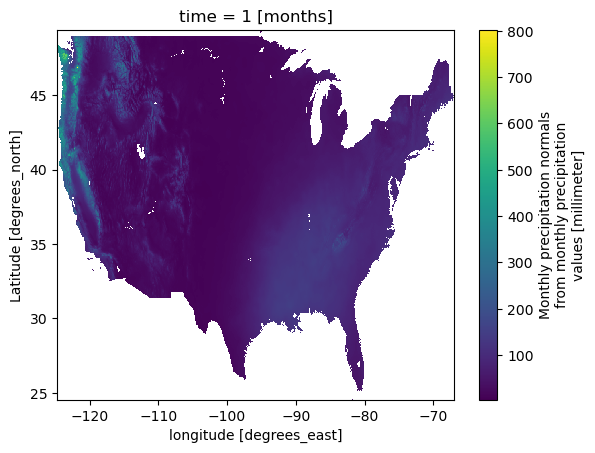

In [10]:
Percip_01_20.mlyprcp_norm[0].plot()

3. Make a plot of the monthly average temperature in August over the Continent US.

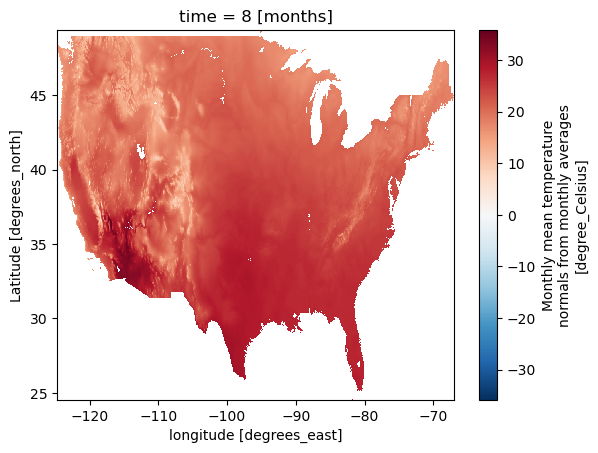

In [17]:
Temp_01_20.mlytavg_norm[7].plot()

To identify climatological zones across the continental US, we will use the 12 monthly average temperature values and the 12 monthly average precipitation values as input features for clustering algorithms. Each latitude and longitude point will be treated as a single sample with 24 features (12 for temperature and 12 for precipitation).

4) First, extract the values for "mlytavg_norm" from the temperature and precipitation NetCDF files and store them in NumPy arrays named `avgtemp` and `avgprec`, respectively.

In [18]:
Temp_01_20.mlytavg_norm

<xarray.DataArray 'mlytavg_norm' (time: 12, lat: 596, lon: 1385)>
array([[[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]],

       [[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]],

       ...,

       [[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]],

       [[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]]], dtype=float32)
Coordinates:
  * lon      (lon) float32 -124.7 -124.6 -124.6 -124.6 ... -67.1 -67.06 -67.02
  * lat      (lat) float32 49.35 49.31 49.27 49.23 ... 24.69 24.65 24.6 24.56
  * time     (time) int32 1 2 3 4 5 6 7 8 9 10 11 12
Attributes:
    long_name:      Monthly mean temperature normals from monthly averages
    standard_name:  air_temperature
    units:          degree_Celsius
    valid_min:      -100.f
    valid_max:      100.f
    comment:        Values should be rounded to the nearest tenth

In [19]:
avgtemp_stacked = Temp_01_20.mlytavg_norm.stack(points=('lat','lon'))

In [20]:
avgtemp = avgtemp_stacked.transpose('points','time').to_numpy()

In [21]:
avgtemp

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)

In [22]:
avgprec = Percip_01_20.mlyprcp_norm.stack(points=('lat','lon')).transpose('points','time').to_numpy()

In [24]:
avgprec.shape

(825460, 12)

5. Put the latitude and longitude values into numpy arrays, and use the `np.meshgrid` function to create a 2D array that gives the latitude and longitude value at each point on the map:
~~~
lat_grid, lon_grid = np.meshgrid(lats, lons, indexing="ij")
~~~
We'll use these arrays later to create labels for the latitude and longitude points associated with each sample.

In [29]:
lats = Temp_01_20.lat.values
lons = Temp_01_20.lon.values

In [30]:
lat_grid, lon_grid = np.meshgrid(lats, lons, indexing="ij")

In [25]:
from sklearn.cluster import KMeans 

6. Use the `np.isnan` function to create a mask that gives a value of 1 where there is data and a value of 0 where there is no data in the 2D array of the precipitation and temperature maps over the continental US. This mask should have the same dimensions as latitude by longitude. Hint: `np.isnan` returns 1 (True) if the value is `NaN`. 

In [35]:
temp_mask = ~np.isnan(avgtemp).any(axis=1)
precip_mask = ~np.isnan(avgprec).any(axis=1)
temp_precip_mask = temp_mask & precip_mask

7. Use the mask to index the numpy arrays of `avgtemp`, `avgprec`, `lat_grid`, and `lon_grid` to create arrays called `avgtemp_masked`, `avgprec_masked`, `lat_masked`, and `lon_masked`. These arrays now should no longer have any NaN's.

In [37]:
lat_flat = lat_grid.flatten()
lon_flat = lon_grid.flatten()

In [38]:
avgtemp_masked = avgtemp[temp_mask]
avgprec_masked = avgprec[precip_mask]
lat_masked = lat_flat[temp_precip_mask]
lon_masked = lon_flat[temp_precip_mask]

8. `sci-kit learn` functions assume that the sample number ($n_{sample}$) is the first dimension in an array, and the features associated with a sample are in the second dimension in an array. Transpose the `avgprec_masked` and `avgtemp_masked` to get the correct ordering of dimensions. Check the shape of the arrays are now $n_{sample}$ x 12.

In [39]:
avgtemp_masked.shape

(469758, 12)

In [40]:
avgprec_masked.shape

(469758, 12)

## Part 2: Pre-process the data

9. Scale the precipitation and temperature arrays between -1 and 1. We want to do this so that all 12 months are scaled relative to the same minimum and maximum values for precipitation or temperature, respectively. You can use the `MinMaxScaler` from `sci-kit learn` (you will have to reshape the arrays to do this) or alternatively write your own function to do this scaling.

In [41]:
from sklearn.preprocessing import MinMaxScaler

In [42]:
scaler = MinMaxScaler(feature_range=(-1,1))

avgtemp_scaled = scaler.fit_transform(avgtemp_masked)
avgprec_scaled = scaler.fit_transform(avgprec_masked)

10. Create a feature array `X` that is $n_{samples}$ by $n_{features}$, where $n_{features}$=24 (i.e. it combines the two arrays that contain the scaled temperature and precipitation monthly averages associated with each sample).

In [43]:
X = np.concatenate([avgtemp_scaled, avgprec_scaled], axis=1)

In [44]:
X.shape

(469758, 24)

## Part 3: Use K-Means Clustering to Label Climate Zones

11. Use the `KMeans` method from `sklearn.cluster` to fit 8 clusters to the `X` feature matrix.

In [47]:
km = KMeans(n_clusters=8, random_state=42)

cli_label = km.fit_predict(X)

12. Make a scatter plot of `lat_masked` vs. `lon_masked` and color each point by its kmeans label. Set the size of the points in the scatter points to 0.1 and use a colormap that is discrete (rather than continuous).

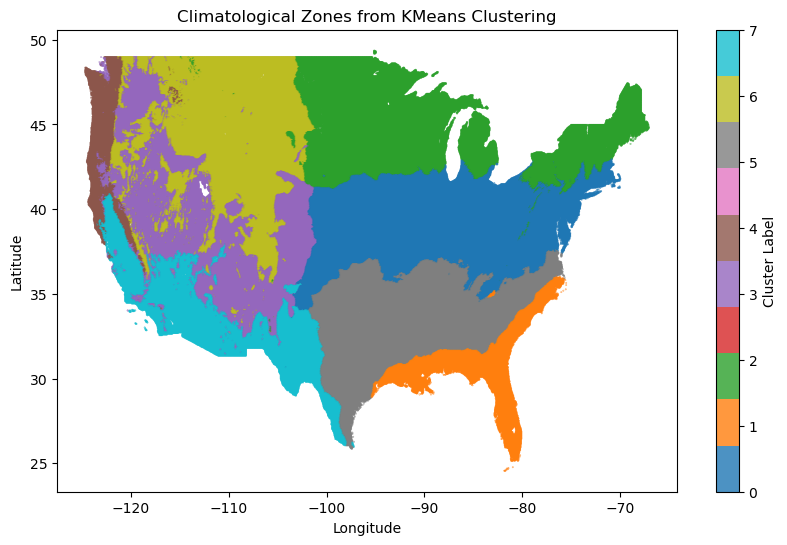

In [48]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
scatter = plt.scatter(lon_masked, lat_masked, c=km.labels_, cmap='tab10', s=0.1, alpha=0.8)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Climatological Zones from KMeans Clustering')
plt.colorbar(scatter, label='Cluster Label')
plt.show()


You can compare the climate zones discovered by the K-Means clustering approach with the map [here](https://www.cec.org/mapmonday/climate-zones-in-north-america/).

13. Repeat parts 11. and 12. but choose a different number of clusters to fit Kmeans. 

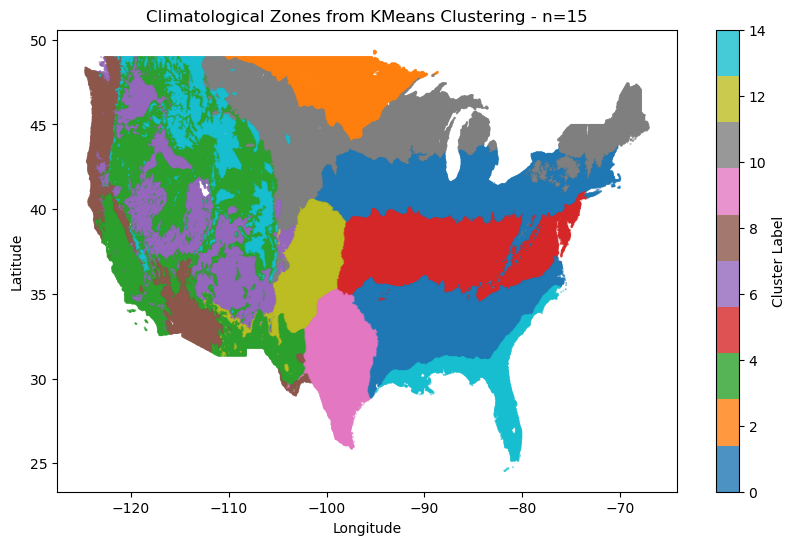

In [49]:
km15 = KMeans(n_clusters=15, random_state=42)

cli_label = km15.fit_predict(X)

import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
scatter = plt.scatter(lon_masked, lat_masked, c=km15.labels_, cmap='tab10', s=0.1, alpha=0.8)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Climatological Zones from KMeans Clustering - n=15')
plt.colorbar(scatter, label='Cluster Label')
plt.show()

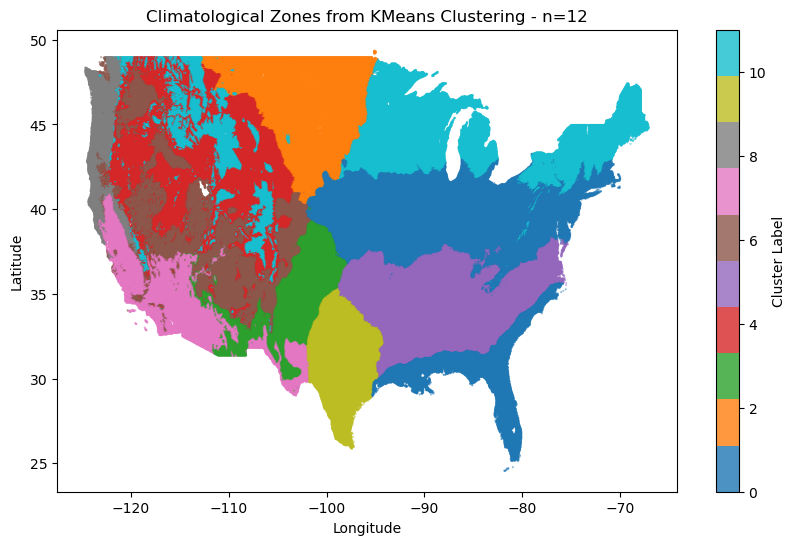

In [50]:
km12 = KMeans(n_clusters=12, random_state=42)

cli_label = km12.fit_predict(X)

import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
scatter = plt.scatter(lon_masked, lat_masked, c=km12.labels_, cmap='tab10', s=0.1, alpha=0.8)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Climatological Zones from KMeans Clustering - n=12')
plt.colorbar(scatter, label='Cluster Label')
plt.show()

## Part 4: Use a Gaussian Mixture Model to Label Climate Zones

14. Use the `GaussianMixture` method from `sklearn.mixture` to fit 8 components to the `X` feature matrix.

In [52]:
from sklearn.mixture import GaussianMixture

In [53]:
gm = GaussianMixture(n_components=8, random_state=42)
gm.fit(X)

GaussianMixture(n_components=8, random_state=42)

In [54]:
gm_labels = gm.predict(X)

15.  Make a scatter plot of `lat_masked` vs. `lon_masked` and color by the components learned by the Gaussian Mixture Model. Set the size of the scatter points to 0.1 and use a colormap that is discrete (rather than continuous).

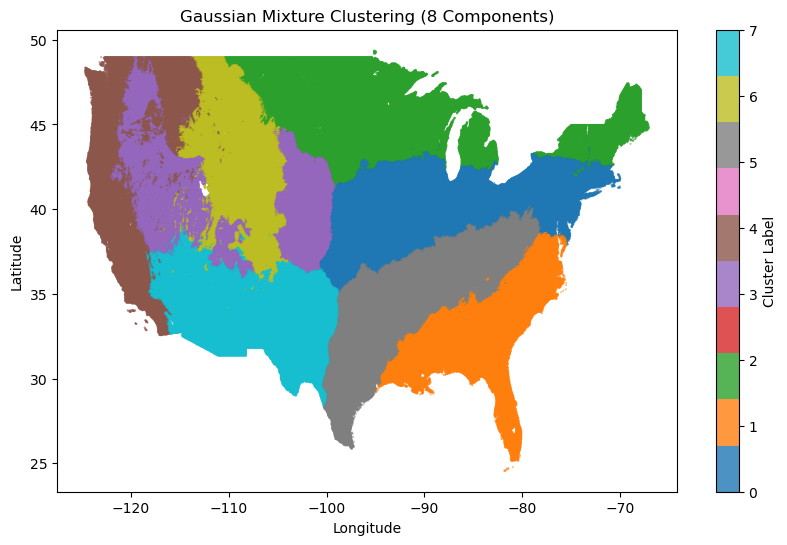

In [55]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
scatter = plt.scatter(lon_masked, lat_masked, c=gm_labels, cmap='tab10', s=0.1, alpha=0.8)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Gaussian Mixture Clustering (8 Components)')
plt.colorbar(scatter, label='Cluster Label')
plt.show()